<a href="https://colab.research.google.com/github/toba717/ACM_AI_Projects/blob/main/Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Final Project**
Takao Oba

ACM AI


In [ ]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Function to be learned - a line
### $$f(x)=\pi x + 10$$

In [ ]:
# TO DO: implement f(x) - 1 line
def f(x):
  return np.pi * x + 10

In [ ]:
# input data
n = 100

# TO DO: generate 100 data points in the range of [-5,5] - 1 line, test f on our data
x = np.linspace(-5,5, num = n)
f(x)


array([-5.70796327e+00, -5.39063068e+00, -5.07329809e+00, -4.75596549e+00,
       -4.43863290e+00, -4.12130031e+00, -3.80396772e+00, -3.48663513e+00,
       -3.16930254e+00, -2.85196995e+00, -2.53463736e+00, -2.21730476e+00,
       -1.89997217e+00, -1.58263958e+00, -1.26530699e+00, -9.47974399e-01,
       -6.30641808e-01, -3.13309216e-01,  4.02337494e-03,  3.21355966e-01,
        6.38688557e-01,  9.56021149e-01,  1.27335374e+00,  1.59068633e+00,
        1.90801892e+00,  2.22535151e+00,  2.54268411e+00,  2.86001670e+00,
        3.17734929e+00,  3.49468188e+00,  3.81201447e+00,  4.12934706e+00,
        4.44667965e+00,  4.76401224e+00,  5.08134484e+00,  5.39867743e+00,
        5.71601002e+00,  6.03334261e+00,  6.35067520e+00,  6.66800779e+00,
        6.98534038e+00,  7.30267297e+00,  7.62000557e+00,  7.93733816e+00,
        8.25467075e+00,  8.57200334e+00,  8.88933593e+00,  9.20666852e+00,
        9.52400111e+00,  9.84133370e+00,  1.01586663e+01,  1.04759989e+01,
        1.07933315e+01,  

In [ ]:
# initialize the weight and bias randomly
w = np.random.rand(1)
b = np.random.rand(1)

## Our hypothesis
### $$\hat{y}(x)=wx+b$$

In [ ]:
# TO DO: implement y_hat - 1 line
def y_hat(w, b, x):
  return w*x + b
     

In [ ]:
x = x.reshape(1, 100)
x.shape

(1, 100)

In [ ]:
y = f(x)
y.shape

(1, 100)

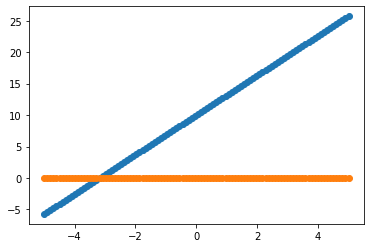

In [ ]:
# model with no training
plt.scatter(x, y)
plt.scatter(x, y_hat(0, 0, x))

## Loss function - Mean Squared Error
### $$L(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \big(y_i-\hat{y_i}\big)^2 $$

In [ ]:
# TO DO: implement mse - 1 to 2 lines
def mse(y, y_hat):
     loss = np.average(((y - y_hat)**2))
     return loss

## np.dot example

In [ ]:
a = np.array([[1,2,3]])
c = a


In [ ]:
a.shape

(1, 3)

In [ ]:
np.dot(a, c.T)

array([[14]])

In [ ]:
np.dot(a.T, c)


array([[1, 2, 3],
       [2, 4, 6],
       [3, 6, 9]])

In [ ]:
a*c

array([[1, 4, 9]])

## Gradients with respect to w, b
### $$ \frac{\partial L}{\partial w} = \frac{2}{n}\sum_{i=1}^{n}\big(\hat{y_i}-y_i\big)x_i$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{n}\sum_{i=1}^{n}\big(\hat{y_i}-y_i\big)$$

In [ ]:
# return type is a dictionary
def gradients(x, y, y_hat):
    n = y.shape[1]
    grads = {}
    
    # TO DO: add the gradients with respect to w, b to grads - 2 lines
    grads["dw"] = (2/n) * np.sum(np.dot((y_hat - y), (x.T)))
    grads["db"] = (2/n) * (np.sum(y_hat - y))
      
    return grads

In [ ]:
gradients(x, y, y_hat(w, b, x))


{'dw': -42.92861346803158, 'db': -18.848658900820478}

## Training our model - update w, b accordingly
### $$w = w - \alpha \frac{\partial L}{\partial w}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$

In [ ]:
def gradient_descent(x, y, w, b, learning_rate):
    # initialize params
    alpha = learning_rate
    losses = []

    # training model
    for i in range(50):
        # TO DO: get the predictions using w, b, x using a function that we defined - 1 line
        predictions = y_hat(w,b,x)
        # TO DO: get the gradients using x, y, predictions using a function that we defined - 1 line
        grads = gradients(x,y,predictions)
        # TO DO: update w, b - 2-4 lines
        dw = grads['dw']
        db = grads['db']
        w[0] -= alpha*dw
        b[0] -= alpha*db

        # compute loss
        loss = mse(y, predictions)
        losses.append(loss)

    return w, b, losses 

In [ ]:
# TO DO: run linear regression using the gradient_descent function, set learning_rate to 0.03 - 1 line
w,b,losses = gradient_descent(x,y,w,b, 0.03)
print('w:', w)
print('b:', b)

w: [3.14159265]
b: [9.5727883]


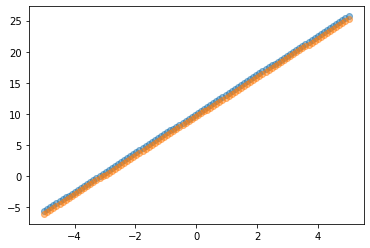

In [ ]:
# Now the two lines should overlap, which means our gradient descent algorithm is successful
plt.scatter(x, y, alpha=0.5)
plt.scatter(x, y_hat(w, b, x), alpha=0.5)

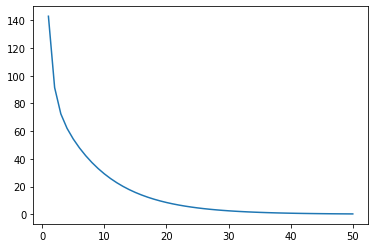

In [ ]:
# loss 
plt.plot(range(1, len(losses)+1), losses)


## The effect of different learning rates

In [ ]:
# you are welcome to experiment with different learning rates other than the ones we have provided
w_small_alpha, b_small_alpha, losses_small_alpha = gradient_descent(x, y, w,b, learning_rate=0.01)
w_large_alpha, b_large_alpha, losses_large_alpha = gradient_descent(x, y, w,b, learning_rate=0.1)

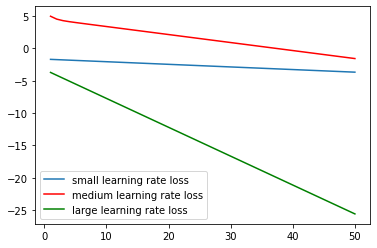

In [ ]:
plt.plot(range(1, len(losses)+1), np.log(losses_small_alpha), label='small learning rate loss')
plt.plot(range(1, len(losses)+1), np.log(losses), c='r', label='medium learning rate loss')
plt.plot(range(1, len(losses)+1), np.log(losses_large_alpha), c='g', label='large learning rate loss') 
plt.legend()

## Now let's apply what we learned to a real data set

In [ ]:
# load the dataset from Github
url = 'https://raw.githubusercontent.com/uclaacmai/beginner-track-fall-2020/main/Workshop_8/sat_vs_gpa.csv'
data = pd.read_csv(url)
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
# TO DO: put each column (sat and gpa) into its own ndarray - 2 lines
sat = np.array(data["SAT"])
gpa = np.array(data["GPA"])

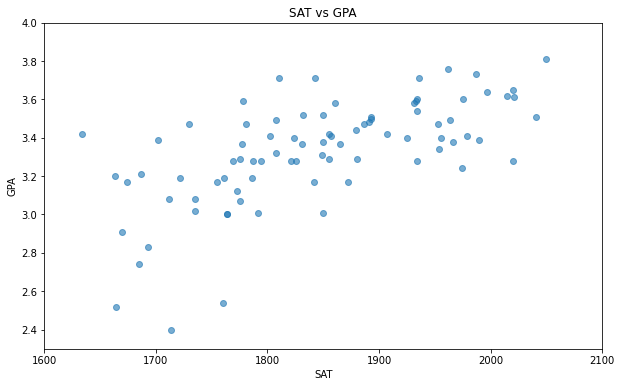

In [ ]:
# plotting data
plt.figure(figsize=(10,6))
plt.scatter(sat, gpa, alpha=0.6)
plt.title('SAT vs GPA')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.xlim(1600,2100)
plt.ylim(2.3,4)
plt.show()

In [ ]:
# TO DO: reshape sat and gpa - 2 to 3 lines
n = sat.shape[0]
x = sat.reshape(1,n)
y = gpa.reshape(1,n)
print('shape of x:', x.shape)
print('shape of y:', y.shape)

shape of x: (1, 84)
shape of y: (1, 84)


In [ ]:
# TO DO: initialize w, b randomly - 2 lines
w2 = np.random.rand(1)
b2 = np.random.rand(1)

In [ ]:
# TO DO: run linear regression using the gradient_descent function - 1 line
# Hint: picking an optimal learning rate is KEY
w2,b2,losses = gradient_descent(x,y,w2,b2,0.0000005)
print('w2:', w2)
print('b2:', b2)

w2: [9.66455731e+18]
b2: [5.22091088e+15]


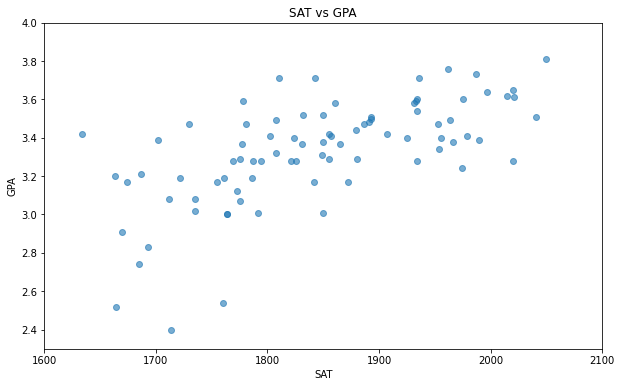

In [ ]:
# plotting data
plt.figure(figsize=(10,6))
plt.scatter(sat, gpa, alpha=0.6)
plt.title('SAT vs GPA')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.xlim(1600,2100)
plt.ylim(2.3,4)

# TO DO: plot the best fit line using the w, b that was computed - 2-3 lines
x = np.linspace(1600, 2100, 500)
y = y_hat(w2, b2, x)
plt.scatter(x, y, alpha = 0.5)


plt.show()

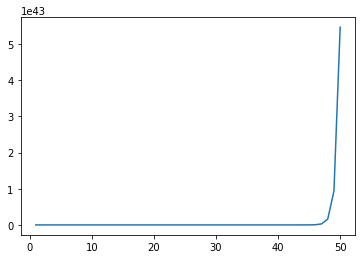

In [ ]:
# loss
plt.plot(range(1, len(losses)+1), losses)

# Well done! Now let's build on what we learned by running linear regression on a more complex dataset

In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

# Remember the housing example that was discussed when we learned about linear regression? Let's revisit it one last time (in beginner track).

In [ ]:
# documentation
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston_dataset.data.shape

(506, 13)

In [ ]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
boston_dataset.target.shape

(506,)

## Since we are working with a huge dataset, using pandas Dataframe to organize our data is a good idea!

In [ ]:
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Data Cleaning

In [ ]:
# slice the DataFrame to get a training dataset and testing dataset; use the 80-20 ratio
x_train = data.iloc[:400, :]
x_test = data.iloc[400:, :]

In [ ]:
x_train.shape

(400, 13)

In [ ]:
x_test.shape

In [ ]:
# Slice the labels to get a training label and testing label
y_train = boston_dataset.target[:400]
y_test = boston_dataset.target[400:]

In [ ]:
y_train = y_train.reshape(1, 400)

In [ ]:
y_test = y_test.reshape(1,106)

In [ ]:
# TO DO: initialize the weights and bias randomly; for weights use (1,n) as shape where n is the number of features - 2-3 lines
w3 = np.random.rand(1,13)
b3 = np.random.rand(1)



# Bad news! The functions that we implemented earlier only works on datasets with only 1 feature.
## Challenge: reimplement y_hat, gradients, gradient_descent such that they are compatible with a dataset with 13 features!

## $$\textbf{y-hat - muldimensional version}$$
### $$ \hat{y} = WX^T + b$$

In [ ]:
# TO DO: implement y_hat_boston - 1 line
def y_hat_boston(w, b, x):
    return np.dot(w*x.T) + b

## $$\textbf{Gradients of Loss with respect to W, b}$$
### $$ \frac{\partial L}{\partial W} = \frac{2}{N}X\big(\hat{y}-y\big)$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}\big(\hat{y_i}-y_i\big)$$

In [ ]:
def gradients_boston(x, y, y_hat):
    n = y.shape[1]
    grads = {}

    grads['dw'] = (2/n)*np.dot((y_hat - y), x)
    grads['db'] = (2/n)*np.sum(y_hat - y)
      
    return grads

In [ ]:
def gradient_descent_boston(x_train, y_train, x_test, y_test, learning_rate, w, b):
    # initialize params
    alpha = learning_rate
    losses_train = []
    losses_test = []

    # training model
    for i in range(50):
        predictions = y_hat_boston(w, b, x_train) 
        grads = gradients_boston(x_train, y_train, predictions)
        db = grads['db']
        dw = grads['dw']
        
        b -= alpha*db
        w -= alpha*dw 

        # compute loss for training data
        loss_train = mse(y_train, predictions)
        losses_train.append(loss_train)

        # compute loss for testing data
        test_predictions = y_hat_boston(w, b, x_test)
        loss_test = mse(y_test, test_predictions)
        losses_test.append(loss_test)

    return w, b, losses_train, losses_test

In [ ]:
w3, b3, losses_train, losses_test = gradient_descent_boston(x_train, y_train, x_test, y_test, 0.000003, w3, b3)

ValueError: ignored

In [ ]:
print(w)
print(b)

In [ ]:
plt.plot(range(1, len(losses_train)+1), losses_train, label='training loss')
plt.plot(range(1, len(losses_test)+1), losses_test, label='testing loss')
plt.legend()

# So that was pretty tedious, right? Luckily we don't have to write this much code every time we'd like to run linear regression because scikit-learn has got our back!

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# TO DO: store the inputs into X and targets into Y - 2 lines

X = boston_dataset.data
Y = boston_dataset.target




# time for some sklearn magic
regression = LinearRegression().fit(X, Y)
regression.coef_.shape

(13,)

In [ ]:
# weights
regression.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [ ]:
# bias
regression.intercept_

36.459488385090125

# How does your model do compared to sklearn's model?

# Logistic Regression

In [ ]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# set the random seed
np.random.seed(0)

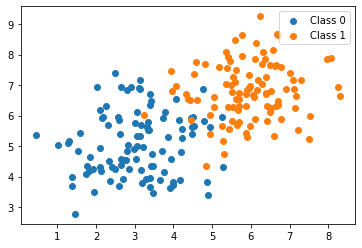

In [ ]:
# create data
x11 = np.random.normal(loc=3, size=100)
x12 = np.random.normal(loc=5, size=100)

x0 = np.stack((x11, x12)).T

x21 = np.random.normal(loc=6, size=100)
x22 = np.random.normal(loc=7, size=100)

x1 = np.stack((x21, x22)).T

X_ori = np.zeros((200, 2))
y_ori = np.zeros(200)
y_ori[100:] = 1
X_ori[:100] = x0
X_ori[100:] = x1

indicies = np.random.choice(np.arange(200), replace=False, size=200)
X = np.zeros((200, 2))
y = np.zeros(200)
X = X_ori[indicies]
y = y_ori[indicies]

plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')
plt.legend()

# augment with 1's

# X = np.hstack((np.ones((200, 1)), X))

In [ ]:
# shape
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (200, 2)
Shape of y: (200,)


In [ ]:
# TO DO: split training and test data with train_test_split - 1 line


###**Classes in Python**

In [ ]:
class Rectangle: 

  def __init__(self, b, h): 
      self.b = b 
      self.h = h 
  def area(self): 
      return self.b*self.h 
  def perimeter(self): 
      # TO DO 
      return self.b*2 + self.h*2
      pass

In [ ]:
my_rect = Rectangle(3, 5) 
print("Area: ", my_rect.area())
print("Perimeter: ", my_rect.perimeter())

# $$\textbf{Brief Review of Logistic Regression}$$
#### N: number of samples
#### f: number of features
#### X: data; shape = (N, f)
#### y: labels/targets; shape = (N, )
#### W: weights; shape = (f, )
#### b: bias; scalar
#### a: learning rate; scalar

## $$\textbf{Our hypothesis}$$
### $$\hat{y}(X)=\sigma{(XW+b)}$$

## $$\textbf{Loss function - Binary Cross Entropy}$$
### $$L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N}\big(y_i\log(\hat{y_i}) + (1-y_i)\log(1-\hat{y_i})\big) $$

## $$\textbf{Gradients of Loss with respect to W, b}$$
### $$ \frac{\partial L}{\partial W} = \frac{2}{N}X^T\big(\hat{y}-y\big)$$
### $$ \frac{\partial L}{\partial b} = \frac{2}{N}\sum_{i=1}^{N}\big(\hat{y_i}-y_i\big)$$

## $$\textbf{Gradient Descent - update W, b accordingly}$$
### $$W = W - \alpha \frac{\partial L}{\partial W}$$
### $$b = b - \alpha \frac{\partial L}{\partial b}$$

In [ ]:
# Logistic Regression Class
class Logistic_Regression():
  def __init__(self, num_epochs=2000, lr=0.6, verbose=False):
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    Logistic_Regression fits a linear model with coefficients w = (w1, ..., wf)
    to minimize the binary cross entropy loss between the observed targets in
    the dataset, and the targets predicted by the linear approximation.

    Parameters:
      num_epochs - number of epochs
      lr - learning rate
      verbose - creates a plot if set to True

    Attributes:
      epochs - number of epochs
      alpha - learning rate
      verbose - creates a plot if set to True
      weights - numpy.ndarray with shape (f, )
      bias - float
      losses - list containing the loss of each epoch
    """
    self.epochs = num_epochs
    self.alpha = lr
    self.verbose = verbose

  def init_params(self, X):
    """
    Initialize the parameters of the model based on input data.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      nothing
    """
    # TO DO : Initialize weights and biases according to the shapes of the input - 2 lines
    
    
    self.losses = []
  
  def activate(self, z):
    """
    Activate the outputs of your model using the sigmoid function

    Parameters:
      z - outputs: numpy.ndarray with shape (N, )

    Returns:
      activations - numpy.ndarray with shape (N, )
    """
    # TO DO: implement sigmoid activation function - 1 line
    pass

  def predict(self, X):
    """
    Makes a prediction using the hypothesis.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)

    Returns:
      predictions - numpy.ndarray with shape (N, )
    """
    # TO DO: implement predict (using our hypothesis) - 1 line
    pass

  def loss(self, y, y_hat):
    """
    Computes the Binary Cross Entropy Loss of the current predictions.

    Parameters:
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      loss - float
    """
    # TO DO: compute loss (Binary Cross Entropy) - 1 line
    pass

  def grads(self, X, y, y_hat):
    """
    Computes the gradients of the loss with respect the weights and bias.

    Parameters:
      X - data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )
      y_hat - predictions: numpy.ndarray with shape (N, )

    Returns:
      grads - tuple containing the gradients dw, db
    """
    n = y.shape[0]
    # TO DO: compute gradients - 2 lines
    pass

  def fit(self, X, y):
    """
    Fits the model to the training data and targets.

    Parameters:
      X - training data: numpy.ndarray with shape (N, f)
      y - targets: numpy.ndarray with shape (N, )

    Returns:
      a reference to self
    """
    self.init_params(X)
    # main loop for training
    for i in range(self.epochs):
      # TO DO: implement the training routine - about 5 lines
      pass


      self.losses.append(loss)

    if self.verbose:
      plt.figure(figsize=[8, 6])
      plt.xlabel('epoch')
      plt.ylabel('loss')
      plt.plot(np.arange(1, len(self.losses) + 1), self.losses)
      plt.show()

    return self

In [ ]:
log_reg = Logistic_Regression(verbose=True).fit(X_train, y_train)

In [ ]:
print('weights:', log_reg.weights)
print('bias:', log_reg.bias.round(10))

### **Data Visualization**

In [ ]:
# plot original data
y_pred = log_reg.predict(X)
plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')
plt.legend()

In [ ]:
# plot what our model predicts
plt.scatter(X[y_pred < 0.5][:, 0], X[y_pred < 0.5][:, 1], label='pred blue')
plt.scatter(X[y_pred > 0.5][:, 0], X[y_pred > 0.5][:, 1], label='pred orange')
plt.legend()

In [ ]:
# plot decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(x11, x12, label='Class 0')
plt.scatter(x21, x22, label='Class 1')

slope = - (log_reg.weights[0]/log_reg.weights[1])
intercept = - (log_reg.bias/log_reg.weights[1])
X_plot = np.arange(2, 7)
y_plot = slope * X_plot + intercept
plt.plot(X_plot, y_plot, c='black', label='decision boundary')

plt.legend()

# Which accuracy do you expect to be higher?

In [ ]:
# TO DO: compute train accuracy - 2 lines

print('Train Accuracy:', accuracy_score(y_train, y_pred))

In [ ]:
# TO DO: compute test accuracy - 2 lines

print('Test Accuracy:', accuracy_score(y_test, y_pred))